In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
filename = "FL_Restaurants_Reviews" + ".csv"
path = "C:/Users/tokud/OneDrive/Documents/Machine Learning - UCSD Extension Springboard Course/Capstone/Datasets/" + filename

chunk_iterator = pd.read_csv(path, chunksize=10000)

chunks = []

for chunk in chunk_iterator:
  chunks.append(chunk)

df_reviews = pd.concat(chunks, ignore_index=True)
df_reviews.shape

(792133, 22)

In [4]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792133 entries, 0 to 792132
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   business_id     792133 non-null  object 
 1   name            792133 non-null  object 
 2   address         789849 non-null  object 
 3   city            792133 non-null  object 
 4   state           792133 non-null  object 
 5   postal_code     792109 non-null  float64
 6   latitude        792133 non-null  float64
 7   longitude       792133 non-null  float64
 8   stars_business  792133 non-null  float64
 9   review_count    792133 non-null  int64  
 10  is_open         792133 non-null  int64  
 11  attributes      791260 non-null  object 
 12  categories      792133 non-null  object 
 13  hours           770229 non-null  object 
 14  review_id       792133 non-null  object 
 15  user_id         792133 non-null  object 
 16  stars_reviews   792133 non-null  int64  
 17  useful    

In [5]:
df_reviews.isnull().sum()

business_id           0
name                  0
address            2284
city                  0
state                 0
postal_code          24
latitude              0
longitude             0
stars_business        0
review_count          0
is_open               0
attributes          873
categories            0
hours             21904
review_id             0
user_id               0
stars_reviews         0
useful                0
funny                 0
cool                  0
text                  0
date                  0
dtype: int64

In [6]:
df_reviews.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars_business', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'review_id', 'user_id',
       'stars_reviews', 'useful', 'funny', 'cool', 'text', 'date'],
      dtype='object')

In [7]:
df_reviews.describe()

,postal_code,latitude,longitude,stars_business,review_count,is_open,stars_reviews,useful,funny,cool
count,792109.000000,792133.000000,792133.000000,792133.000000,792133.000000,792133.000000,792133.000000,792133.000000,792133.000000,792133.000000
mean,33783.717001,27.952622,-82.580514,3.835182,368.927141,0.820675,3.833557,0.916979,0.259289,0.478439
std,1731.760872,0.137438,0.161859,0.618499,488.857662,0.383624,1.413321,2.927229,1.460934,2.443079
min,33503.000000,27.564457,-82.850318,1.000000,5.000000,0.000000,1.000000,-1.000000,-1.000000,-1.000000
25%,33606.000000,27.859843,-82.730542,3.500000,89.000000,1.000000,3.000000,0.000000,0.000000,0.000000
50%,33637.000000,27.948902,-82.572262,4.000000,207.000000,1.000000,4.000000,0.000000,0.000000,0.000000
75%,33760.000000,28.024361,-82.459684,4.500000,443.000000,1.000000,5.000000,1.000000,0.000000,0.000000
max,336140.000000,28.498168,-82.103191,5.000000,3260.000000,1.000000,5.000000,227.000000,159.000000,207.000000


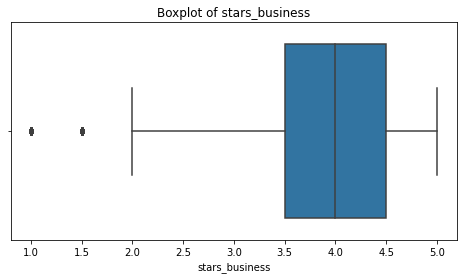

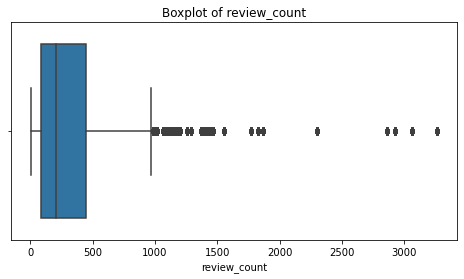

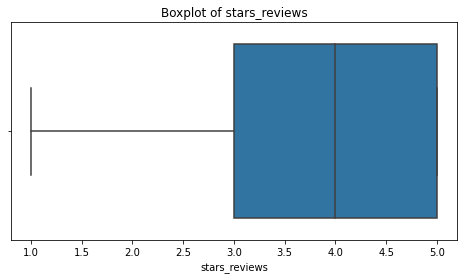

In [8]:
numeric_columns = df_reviews[['stars_business', 'review_count', 'stars_reviews']]


for c in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_reviews[c])
    plt.title(f'Boxplot of {c}')
    plt.show()

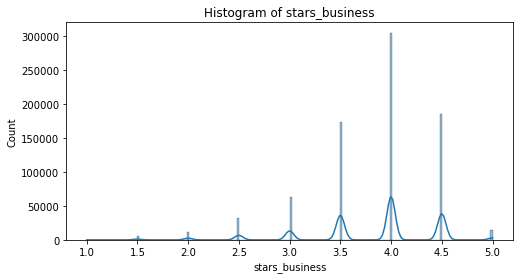

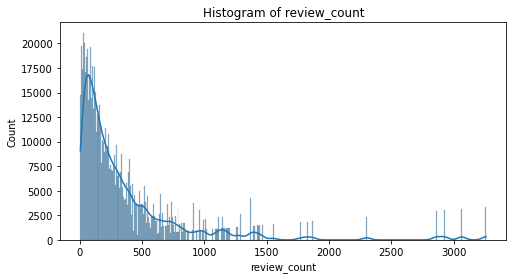

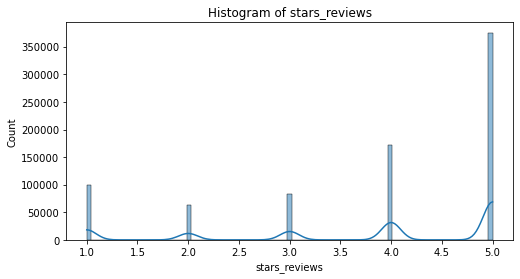

In [9]:
for c in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_reviews[c], kde=True)
    plt.title(f'Histogram of {c}')
    plt.show()

In [10]:
selected_fields = ['business_id', 'name', 'city', 'stars_business', 'review_count', 'stars_reviews', 'text', 'useful', 'funny', 'cool']

df_reviews[selected_fields].head()

,business_id,name,city,stars_business,review_count,stars_reviews,text,useful,funny,cool
0,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,Tampa Bay,4.0,10,5,"I eat pho about 4 times a week and from a specific restaurant, as I have tried just about every other Vietnamese restaurant in the Tampa bay area, and have found this specific one to be the best. After trying The Vietnamese Food Truck's Pho, for the first time today, I was absolutely blown away. It is the perfect balance of salty, savory and thai-basil infused flavor. Without a doubt, this is my new favorite place for pho.",1,0,0
1,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,Tampa Bay,4.0,10,5,I've been in Wesley Chapel area for about 2 years and this is the first decent bowl of Pho I've had. Tampa is quite some distance to grab some. Being Vietnamese and growing up in the states I know how hard and labor intensive this is to make without a full on kitchen. This husband and wife team are amazingly sweet. I will definitely get an bowl every chance I get. I purchase it not assembled so please excuse my lack of sleep presentation skills!!!,2,0,1
2,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,Tampa Bay,4.0,10,3,"Good tasted good - but I'm a bit confused as to how a Vietnamese Good trick serves Vietnamese egg rolls with a mayo-like sauce?? I love Vietnamese food, and have always had fish sauce as one of the condiments. The egg rolls on their own was ok, I even tried the mayo sauce - (not great). Next time - I'll stick with authentic Vietnamese restaurants. But to be fair, the food was standard . I'd actually try it again...if they had the right sauces, of course!",1,1,0
3,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,Tampa Bay,4.0,10,4,"Ordered the chicken wings. They were hot, fresh, and super crispy. Drenched in a honey sauce, that surprisingly, tasted good on the fries that came with the wings. Fantastic!",2,0,1
4,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,Tampa Bay,4.0,10,1,"How can an order of pho take an 1 hour and 15 minutes to make!!!!! No thank you. They had no system for getting the food out. People were flustered and they over sold on items. Terrible. Lesson learned. drive to pho Quyen, it will be faster and cheaper.",2,2,1


In [32]:
grouped_df = df_reviews.groupby('business_id').agg(
    name=('name', 'first'),                      
    city=('city', 'first'),                      
    review_count=('review_count', 'first'),      
    stars_business=('stars_business', 'first'),  
    average_stars_reviews=('stars_reviews', 'mean')  
).reset_index()

grouped_df = grouped_df.sort_values(
    by=['stars_business', 'review_count', 'average_stars_reviews'], 
    ascending=[False, False, False]
)

grouped_df

,business_id,name,city,review_count,stars_business,average_stars_reviews
2207,FHDuu5Mv1bEkusxEuhptZQ,Barracuda Deli Cafe St. Pete Beach,St Pete Beach,521,5.0,4.794393
1926,D9p7-HsY9llYP3BaCVg4DA,Cafe Soleil,St. Pete Beach,468,5.0,4.776842
8484,yOoTTOsIBk10XCszYVnrDQ,AJ's Press,Tampa,376,5.0,4.838542
1719,BZyxr4ocl1hJvFvhlogz0Q,Sulphur Springs Sandwiches Shop,Tampa,336,5.0,4.777778
2422,GwfLqn_jOeYMvmgcL4om1w,German Bistro 2,Largo,301,5.0,4.791139
...,...,...,...,...,...,...
5783,eQG5bKz5S4F0jG8mMw7ohQ,McDonald's,Tampa,5,1.0,1.200000
7219,otEpgG6DdLiKtKtQyfM70g,Popeye's Fried Chicken,Tampa,5,1.0,1.200000
1271,8OyIu5q6Jc_pCeu7vUZXBw,Subway,Clearwater,5,1.0,1.000000
2193,F6zk6xPTLQZFdA0hu6nLgA,Hungry Howie's Pizza & Subs,St. Petersburg,5,1.0,1.000000


In [34]:
most_ratings = df_reviews.groupby('business_id').agg(
    name=('name', 'first'),
    city=('city', 'first'), 
    review_count=('review_count', 'first'),        
    stars_business=('stars_business', 'first')
).reset_index()

most_ratings = most_ratings.sort_values(by='review_count', ascending=False)
most_ratings[0:10]

,business_id,name,city,review_count,stars_business
3697,QHWYlmVbLC3K6eglWoHVvA,Datz,Tampa,3260,4.0
2969,L5LLN0RafiV1Z9cddzvuCw,Ulele,Tampa,3064,4.0
5712,dsfRniRgfbDjC8os848B6A,Bern's Steak House,Tampa,2924,4.5
603,3YqUe2FTCQr0pPVK8oCv6Q,Columbia Restaurant,Tampa,2860,4.0
1968,DXDoh8MNrqjtXsZnkuk4hA,Frenchy's Rockaway Grill,Clearwater Beach,2301,4.0
7321,p_qSQwShIgQnNxGcajI4-w,Oxford Exchange,Tampa,1868,4.5
3639,Ps7Q7BOKzJO4nDTUhbk43Q,Clear Sky Cafe,Clearwater,1824,4.5
5897,fCDMLD21ypv1XZ_EyafCkQ,Bodega,Saint Petersburg,1772,4.5
441,2KIDQyTh-HzLxOUEDqtDBg,Mazzaro's Italian Market,Saint Petersburg,1551,4.5
2902,KXecZki-_3N7afs6HKWM3A,Ichicoro Ramen,Tampa,1466,4.0


In [37]:
top_reviewed = most_ratings[0:10]
bottom_reviewed = most_ratings[-10:]

In [38]:
top_reviewed

,business_id,name,city,review_count,stars_business
3697,QHWYlmVbLC3K6eglWoHVvA,Datz,Tampa,3260,4.0
2969,L5LLN0RafiV1Z9cddzvuCw,Ulele,Tampa,3064,4.0
5712,dsfRniRgfbDjC8os848B6A,Bern's Steak House,Tampa,2924,4.5
603,3YqUe2FTCQr0pPVK8oCv6Q,Columbia Restaurant,Tampa,2860,4.0
1968,DXDoh8MNrqjtXsZnkuk4hA,Frenchy's Rockaway Grill,Clearwater Beach,2301,4.0
7321,p_qSQwShIgQnNxGcajI4-w,Oxford Exchange,Tampa,1868,4.5
3639,Ps7Q7BOKzJO4nDTUhbk43Q,Clear Sky Cafe,Clearwater,1824,4.5
5897,fCDMLD21ypv1XZ_EyafCkQ,Bodega,Saint Petersburg,1772,4.5
441,2KIDQyTh-HzLxOUEDqtDBg,Mazzaro's Italian Market,Saint Petersburg,1551,4.5
2902,KXecZki-_3N7afs6HKWM3A,Ichicoro Ramen,Tampa,1466,4.0


In [39]:
bottom_reviewed

,business_id,name,city,review_count,stars_business
5206,a7dnu3RVo9BHmg1Nzwfw5w,Chinese Gourmet Express,Tampa,5,3.5
6634,kUJBWLIOLrCSVd6878h80g,Son of a Chef - Curbside Dining,Odessa,5,5.0
2657,IfkVDU92FNlBTRW7FMFr_Q,Vincenzo's Ristorante,New Port Richey,5,3.5
645,3wILhQIc2A7pip-M9MC5uQ,Fairway Cafe,Tampa,5,3.0
2649,IcWtPNZIQCybqoDMpvQzjg,Thai 5 Fast Food,Largo,5,4.0
2638,IYdG3pk8DgIcNHz4khph7Q,Caffé Nove,Tampa,5,4.0
6660,kd_18eFapKOfJ3m_HuigcQ,Season Chinese Restaurant,Kenneth City,5,4.0
660,43hwrYgmxo2zJyyLZfEp6w,Long John Silver's,Saint Petersburg,5,2.5
2621,IO6Xrjqxw2H2M4L8NW7rgA,Healthy Hut Market & Cafe,St. Pete Beach,5,2.0
4819,YHpaAneR3gxFm6Ol_EKJAg,Subway,Tampa,5,4.0


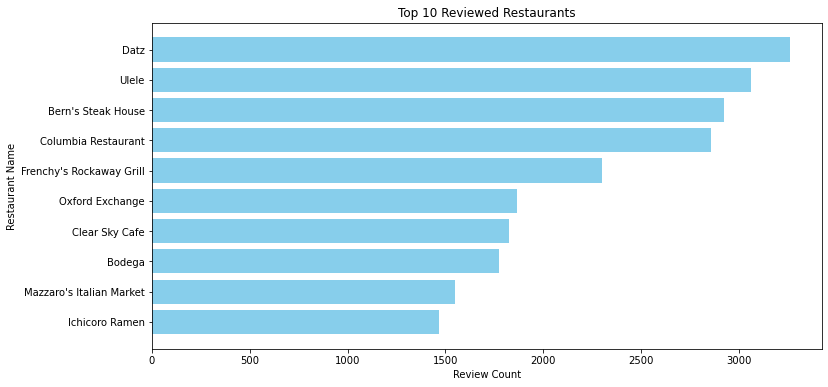

In [40]:
plt.figure(figsize=(12, 6))
plt.barh(top_reviewed['name'], top_reviewed['review_count'], color='skyblue')
plt.xlabel('Review Count')
plt.ylabel('Restaurant Name')
plt.title('Top 10 Reviewed Restaurants')
plt.gca().invert_yaxis()
plt.show()

In [44]:
threshold = 100
filtered_df = grouped_df[grouped_df['review_count'] >= threshold]

filtered_df = filtered_df.sort_values(
    by=['stars_business', 'review_count', 'average_stars_reviews'],
    ascending=[False, False, False]
)

filtered_df[0:10]

,business_id,name,city,review_count,stars_business,average_stars_reviews
2207,FHDuu5Mv1bEkusxEuhptZQ,Barracuda Deli Cafe St. Pete Beach,St Pete Beach,521,5.0,4.794393
1926,D9p7-HsY9llYP3BaCVg4DA,Cafe Soleil,St. Pete Beach,468,5.0,4.776842
8484,yOoTTOsIBk10XCszYVnrDQ,AJ's Press,Tampa,376,5.0,4.838542
1719,BZyxr4ocl1hJvFvhlogz0Q,Sulphur Springs Sandwiches Shop,Tampa,336,5.0,4.777778
2422,GwfLqn_jOeYMvmgcL4om1w,German Bistro 2,Largo,301,5.0,4.791139
312,1N9WC6FwF8MSc7BHbIP35A,Vegan International Co. Kitchen & Market,Tampa,269,5.0,4.775000
5405,bjQrmBSu1A7f5vprEikOKA,Healthy N Fresh Cafe,Tampa,238,5.0,4.808333
3959,S5LnH1njwFBlq77tIkjI1g,Yolk White & Associates,Tampa,229,5.0,4.930435
300,1FYdMkv1bc-sKUrjalyKxQ,Hole In One Donut,Tampa,214,5.0,4.784404
2641,IZFXEqgeRt7ukNuE6P3dgA,Kpicu,Clearwater,203,5.0,4.803828


In [56]:
underfour = filtered_df[filtered_df['stars_business'] < 4.0]
underfour[0:10]

,business_id,name,city,review_count,stars_business,average_stars_reviews
5048,_0QZGrg91aaiMhh7tQyYYg,Jacksons Bistro Bar & Sushi,Tampa,1115,3.5,3.374346
1607,AlH5V97JSAu7AL_xdibMIg,Bahama Breeze,Tampa,1099,3.5,3.691556
5003,ZfOS7Mz-iGseNxBhlhXm_w,Lucky Dill Deli,Palm Harbor,965,3.5,3.600198
6211,hXvf5a798WvQtFn0Zbh2yw,Caddy's Treasure Island,Treasure Island,908,3.5,3.585443
8529,yb2vAoH3E-R11yWmnT570w,Taco Bus,Tampa,875,3.5,3.641612
4643,X0vPZIkbUj22afBQz5-neA,Ford's Garage,Brandon,839,3.5,3.353659
4679,XF2SR4yNnIOGRGH9goofuA,Cassis St. Pete,St Petersburg,834,3.5,3.406214
604,3Z4rhPFO6XWJRQipEIZCWA,Casa Tina,Dunedin,806,3.5,3.625745
8598,z4pCmH_yphNtse3ySNCzFw,Palm Pavilion Beachside Grill & Bar,Clearwater Beach,805,3.5,3.616137
2020,DvBdqAA3XleMaOMwBl7g4g,Kona Grill - Tampa,Tampa,792,3.5,3.519231


In [54]:
undertwo = filtered_df[filtered_df['stars_business'] < 2.0]
undertwo.tail(10)

,business_id,name,city,review_count,stars_business,average_stars_reviews
8298,wyBw4qhls497idjzCCm15Q,El Patron Pizzeria,Tampa,140,1.5,1.298611
3916,Ri2S4YEre3xTmWUCO2XEGQ,Popeyes Louisiana Kitchen,Riverview,106,1.5,1.472727
6560,k37i1EW_x848o_n1ATcErg,NY Pizza Grill,Tampa,102,1.5,1.317757


In [58]:
df_reviews[df_reviews['business_id'] == 'k37i1EW_x848o_n1ATcErg'][selected_fields].head()

,business_id,name,city,stars_business,review_count,stars_reviews,text,useful,funny,cool
49188,k37i1EW_x848o_n1ATcErg,NY Pizza Grill,Tampa,1.5,102,1,"Wow! I just wrote a scathing review about El Patron Pizza in Tampa for leaving unwanted and unwelcome fliers under the door of unsuspecting tourist here in Tampa. I was going to use a lot of the same issues for this review of New York Pizza Grill, but now I'm not sure what to say, only to say it carefully. I knew there was something not quite right about the greasy looking punk that was meandering in the hallway of the 4 star hotel where I am currently residing. As soon as I saw the flier I grabbed my room key and went looking for this person. In hindsight that was not smart, as soon as I got a look at the guy, I ran for the elevator. Now, I am no shrinking violet, but this guy looked like he's slap his own mother. After reading the other reviews on here, I guess I should be happy that this employee didn't turn around and attack! My biggest issue with this business is that they litter the halls and rooms with these fliers. They sneak into hotels, a place where you feel safe and after this, I don't. It doesn't seem to matter where it is a 5 star hotel chain or a family run business. I did call every one of the pizza place that do this, because I felt bad about complaining to the staff at the hotel, but after yesterdays run in with greasy guy for New York Pizza Grill, I had it. I do not feel safe and I told management that, and the did call the police. So, for the employee of New York Pizza Grill, if you get caught stuffing fliers under doors where you are not invited and do not belong, you are more than likely going to be arrested. So when you are out and about making not enough to keep your car running, ask yourself if your boss will bail you out of jail. I doubt it, they'll probably just get another less than intelligent person to litter, trespass, annoy and sometimes terrify, hotel staff and their guests. There are numerous reasons not to eat at New York Pizza Grill, but I'm just tossing out a good reason not to work for them.",0,0,0
49189,k37i1EW_x848o_n1ATcErg,NY Pizza Grill,Tampa,1.5,102,1,"Horrible food. Bread sticks totally dry. Mozzarella sticks more salty than salt itself. And the worst tasting, bland, fettuccine alfredo ever. Gave it a try despite the 1.5 stars but shouldn't have risked it. Wish I could give them a zero.",0,0,0
49190,k37i1EW_x848o_n1ATcErg,NY Pizza Grill,Tampa,1.5,102,1,"Worst place ever. I ordered delivery to my hotel, they only delivered half the order, here is what followed:\n\n~8PM: Drive tells me they have the rest of the order on the way with another driver\n~9PM: I call to follow up and am told it just left and should be there shortly\n~10PM: Call back and am told that they can't get in touch with the driver and she has her phone off\n~10:30: I call back and they still can't get in touch with the driver. I tell them my kids are sleeping and I don't want them knocking at the door awakening them.\n~11PM: Call back and tell them this is ridiculous and to credit my account. Very angry manger tells me that when I last called I cancelled the rest of the order (I did not). I tell him that he can credit my card or I will contest the entire amount with my charge company. He then tells me the food was left at the front desk and they tried to call my cell and room (they did not)\n~11:15: The front desk says they never dropped off the food and they pull this stuff often. I call back and tell them that (and I was in the lobby most of the time since I didn't want my kids awakened). He puts the driver on and she says she was just there and the front desk is lying. I ask if she minds if I put her on speaker so she can call the hotel manager a liar since I believe the hotel. She hands the phone to the manager. He threatens me then hangs up.\n\nI immediately call back and tell him the entire amount will be contested and he says he will credit my charge card. 5 days

In [59]:
df_reviews[df_reviews['business_id'] == 'D9p7-HsY9llYP3BaCVg4DA'][selected_fields].head()

,business_id,name,city,stars_business,review_count,stars_reviews,text,useful,funny,cool
43001,D9p7-HsY9llYP3BaCVg4DA,Cafe Soleil,St. Pete Beach,5.0,468,5,the handmade orangina is delicious-better than the bottled version! and the croissant sandwiches are amazing!,0,0,0
43002,D9p7-HsY9llYP3BaCVg4DA,Cafe Soleil,St. Pete Beach,5.0,468,5,"Finally got to check out Cafe Soleil. One word: Delicieux!! Being from France, I had high expectations, I don't play with my pastries! Boy do they deliver, the croissants were buttery, nice and flaky, and melt in your mouth...even better then some of the ones I had in France. Not surprisingly, the baker ""Nico"" is french, and you could taste the difference in the food. The fact that the products are imported does make a big difference in the taste, it's definitely authentic. Nico was very personable and friendly, it was fun chatting with an ex-parisian :). The one negative thing is they are too far from me, 45 mins drive, but to satiate my sweet tooth, I will definitely be back! I highly recommend this bakery.",0,0,0
43003,D9p7-HsY9llYP3BaCVg4DA,Cafe Soleil,St. Pete Beach,5.0,468,5,Really clean super cute cafe. Very friendly & the Caprese sandwich is amazing. So glad I found this gem :),0,0,0
43004,D9p7-HsY9llYP3BaCVg4DA,Cafe Soleil,St. Pete Beach,5.0,468,4,Great storing coffee and amazing grilled croissants! Even the fruit was great! Affordable and good food.,0,0,0
43005,D9p7-HsY9llYP3BaCVg4DA,Cafe Soleil,St. Pete Beach,5.0,468,5,"Excellent fresh French pastry- so light, crisp, buttery you could suck down three or four before realizing what a decadent pig you were!! Toasted croissants filled with variety of meats, cheeses, veggies- all so good!! Coffee excellent, espresso spot on. This is lunch and breakfast bakery only- so no booze but none needed. Very bright clean French cafe like decor; friendly staff. Great place!",0,0,0


In [60]:
df_reviews[df_reviews['business_id'] == 'AlH5V97JSAu7AL_xdibMIg'][selected_fields].head()

,business_id,name,city,stars_business,review_count,stars_reviews,text,useful,funny,cool
369328,AlH5V97JSAu7AL_xdibMIg,Bahama Breeze,Tampa,3.5,1099,5,Occasionally I drop into this popular spot and have a drink my favorite is the blue - cool breeze- my friend always get the flight trio.\nWe ate the shrimp and lobster quesadillas which were amazing\nOur server name was Louie and he was fast efficient and made our dining experience pleasurable,1,0,0
369329,AlH5V97JSAu7AL_xdibMIg,Bahama Breeze,Tampa,3.5,1099,1,1. Margarita had a long black hair in it. 2. All the food that came with the entrees were cold. 3. Coconut shrimp was over cooked. 4. Firecracker shrimp appetizer was the only good food we had. 5. Waitress forgot to take the drink off the bill.,0,0,0
369330,AlH5V97JSAu7AL_xdibMIg,Bahama Breeze,Tampa,3.5,1099,4,"Good food, nice setting on the water. Once a month they have a Luau menu that is very good - and drink specials! $2.00 well drinks and $4.00 Mai Tai was very good. Ask for ""Rain"" - a great wait person!! Hawaiian dancers were cute - but they were left to change in the corner where people were eating - that was a bit weird!\nThey had serious issues with untrained staff last year but it seems to have been resolved!",0,0,0
369331,AlH5V97JSAu7AL_xdibMIg,Bahama Breeze,Tampa,3.5,1099,5,"Ate there on a foggy Sunday night. Had tried the night before but the wait was 90+ minutes. The place was jumping. However on the next evening ( Sunday ) it was much more to my liking. If it was the weather or the night of the week, the place was about 3/4 full. Seating was immediate and we were offered one of a couple table locations. The staff was fast, yet friendly. Our waiter was very knowledgeable and helpful. Upon making my selection ( Shrimp Curry) he ask if I had it before as it was a newer trial item on the menu. When replied no he suggested that it had not proven popular and in fact around 90% of guests had returned it. I thinker him for his advice and ordered Coconut shrimp ( their most popular item ) instead. It could not have been better. Most places give you maybe 6 or 7 shrimp here I got 15 very large shrimp. They were fantastic. Others in my party got the buttermilk fried chicken ( it was amazing ) and the rack of ribs, which he said was great. \n\nI would totally go here again especially on an "" off quiet night""",0,0,0
369332,AlH5V97JSAu7AL_xdibMIg,Bahama Breeze,Tampa,3.5,1099,4,A local suggested this place to me so I went there for an appetizer and drink. All I know is that the St. Thomas Crab Claws app is the tastiest thing I've had in a long time. Pure crab/butter/garlic goodness. Thanks to Brittany for being a pleasant bartender/server and it seems like a fun night time spot as well.\n\nThe one thing I wasn't fond of is the whole staff had matching Hawaiian shirts on. That made it feel a little like a TGIF.,2,1,1


In [71]:
city_group = df_reviews.groupby('business_id').agg(
    name=('name', 'first'),
    city=('city', 'first'),
    review_count=('review_count', 'first'),
    stars_business=('stars_business', 'first'),
    avg_star_reviews=('stars_reviews', 'mean') 
).reset_index()

city_group = city_group.sort_values(
    by=['review_count', 'avg_star_reviews'],
    ascending=[False, False]
)
city_group[21:30]

,business_id,name,city,review_count,stars_business,avg_star_reviews
4768,XuQ5ekbJ9eRUX06JTqJHaQ,The Mill Restaurant,Saint Petersburg,1257,4.5,4.259601
1430,9cu2p2Z925hHkWHVyrp1JQ,Hawkers Asian Street Food,St. Petersburg,1202,4.0,3.942446
2089,EQP8f7Rq5KXknJixlwxZEw,Salt Rock Grill,Indian Shores,1192,4.0,3.943089
1768,Bxmhm659VqrQYHc0hiku5w,Eddie & Sam's NY Pizza,Tampa,1182,4.5,4.306173
1866,CgiwCrXs3Ggu9eKFPIgjtA,Conch Republic Grill,North Redington Bch,1175,4.0,3.985282
2442,H26zRyQkXXYzUZUOtppFcA,Green Lemon,Tampa,1166,4.5,4.256410
7978,uYMVRPYEqpmVXWN2xOs5KQ,Cooper's Hawk Winery & Restaurants - Tampa,Tampa,1154,4.0,4.124485
901,5oX4G1cptixPZecih9L3dg,Daily Eats,Tampa,1147,4.0,4.182741
1437,9f5GXEeTvBWnrZ-AHEjgJQ,The Original Crabby Bills,Indian Rocks Beach,1144,4.0,3.868687
